In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Milk Production.csv')
df

,Month,Production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       169 non-null    object 
 1   Production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [8]:
df.isnull().sum()

Month         0
Production    0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df

,Month,Production
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0
...,...,...
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0


In [12]:
df=df.set_index(['Month'])

In [13]:
df

,Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


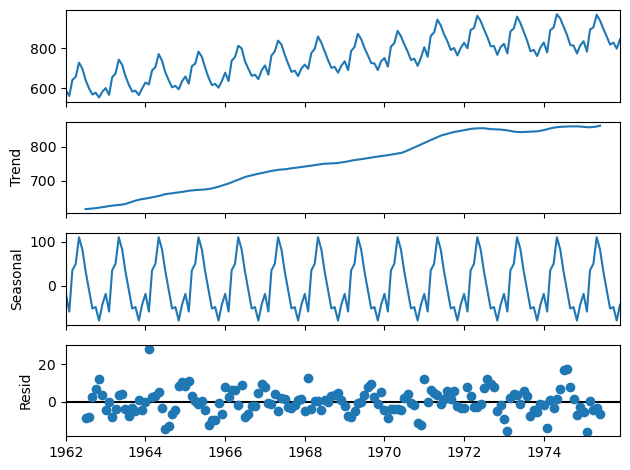

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df)
decomposition.plot();

<Axes: xlabel='Month'>

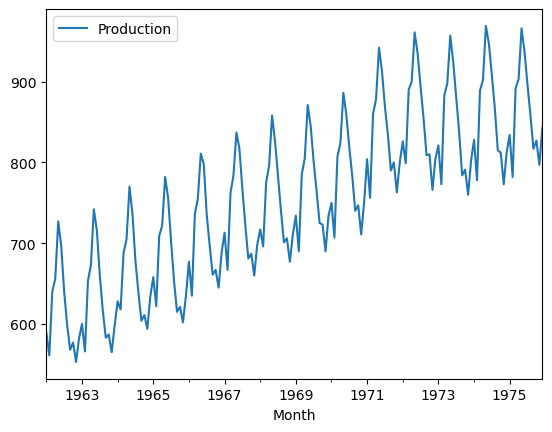

In [16]:
df.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(df)
print('1.ADF STATISTICS:',dftest[0])
print('2.P-VALUE:',dftest[1])
print('3.No of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5.Critical values:')
for keys,values in dftest[4].items():
    print(f'{keys}:{values}')

1.ADF STATISTICS: -1.303811587422123
2.P-VALUE: 0.6274267086030346
3.No of lags: 13
4.No of observations: 154
5.Critical values:
1%:-3.473542528196209
5%:-2.880497674144038
10%:-2.576878053634677


In [18]:
if dftest[1]>=0.05:
    print('Not Stationary')
else:
    print('Stationary')

Not Stationary


In [19]:
mean_df=df.rolling(window=12).mean()
std_df=df.rolling(window=12).std()

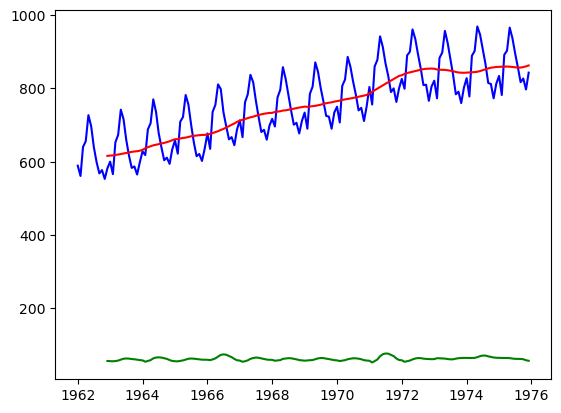

In [20]:
plt.plot(df,color='blue',label='Original Label')
plt.plot(mean_df,color='red',label='Rolling Mean')
plt.plot(std_df,color='green',label='Rolling Std')

In [21]:
import numpy as np
first_log_df=np.log(df)
first_log_df=first_log_df.dropna()

In [23]:
first_log_mean=first_log_df.rolling(window=12).mean()
first_log_std=first_log_df.rolling(window=12).std()

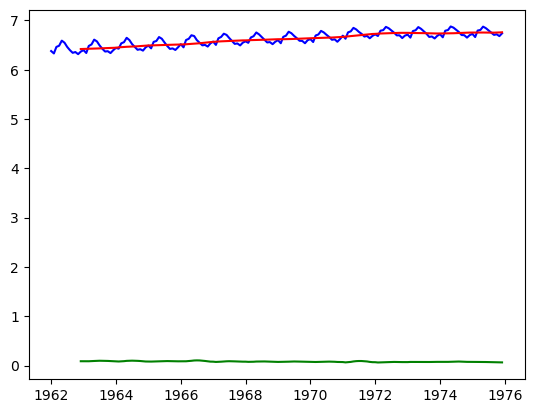

In [25]:
plt.plot(first_log_df,color='blue',label='Original Label')
plt.plot(first_log_mean,color='red',label='Rolling Mean')
plt.plot(first_log_std,color='green',label='Rolling Std')

In [29]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(first_log_df)
print('1.ADF STATISTICS:',dftest[0])
print('2.P-VALUE:',dftest[1])
print('3.No of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5.Critical values:')
for keys,values in dftest[4].items():
    print(f'{keys}:{values}')

1.ADF STATISTICS: -1.754796629511128
2.P-VALUE: 0.40312340233547905
3.No of lags: 13
4.No of observations: 154
5.Critical values:
1%:-3.473542528196209
5%:-2.880497674144038
10%:-2.576878053634677


In [30]:
if dftest[1]>=0.05:
    print('Not Stationary')
else:
    print('Stationary')

Not Stationary


In [33]:
new_data=first_log_df-first_log_mean
new_data=new_data.dropna()

In [34]:
new_data_mean_df=new_data.rolling(window=12).mean()
new_data_std_df=new_data.rolling(window=12).std()

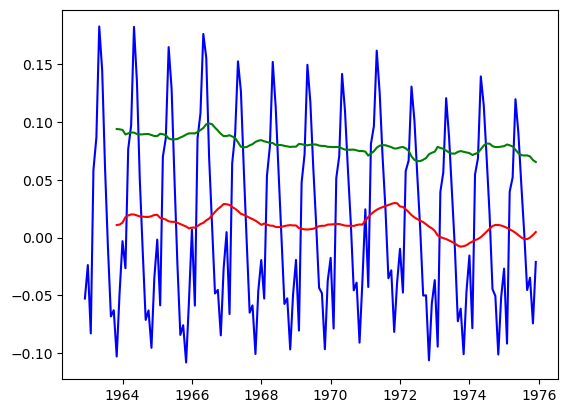

In [35]:
plt.plot(new_data,color='blue',label='Original Label')
plt.plot(new_data_mean_df,color='red',label='Rolling Mean')
plt.plot(new_data_std_df,color='green',label='Rolling Std')

In [36]:
from statsmodels.tsa.stattools import adfuller
dftest=adfuller(new_data)
print('1.ADF STATISTICS:',dftest[0])
print('2.P-VALUE:',dftest[1])
print('3.No of lags:',dftest[2])
print('4.No of observations:',dftest[3])
print('5.Critical values:')
for keys,values in dftest[4].items():
    print(f'{keys}:{values}')

1.ADF STATISTICS: -3.321011214943703
2.P-VALUE: 0.013965001618371295
3.No of lags: 13
4.No of observations: 143
5.Critical values:
1%:-3.4769274060112707
5%:-2.8819726324025625
10%:-2.577665408088415


In [37]:
if dftest[1]>=0.05:
    print('Not Stationary')
else:
    print('Stationary')

Stationary


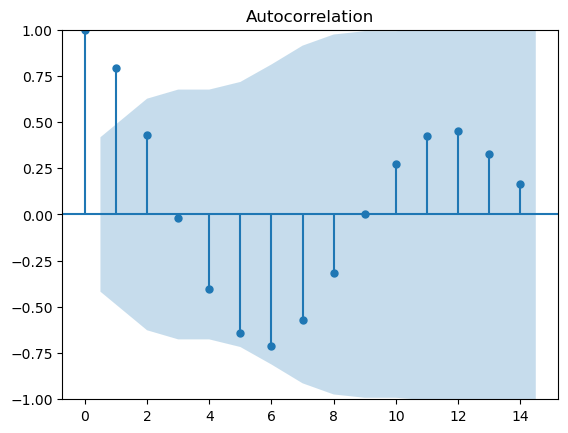

In [39]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(new_data)
plot_acf=plot_acf(acf_plot)###q==2

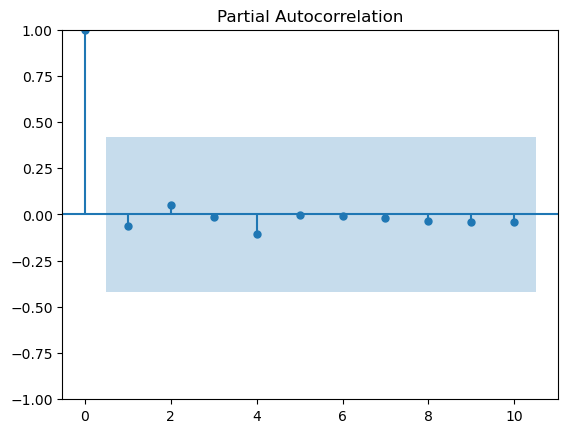

In [41]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(new_data)
plot_pacf=plot_pacf(pacf_plot,lags=10)##p==2

In [43]:
new_data=new_data.dropna()

In [44]:
new_data.shape

(157, 1)

In [46]:
train_df=new_data.iloc[:150]['Production']
test_df=new_data.iloc[151:]['Production']

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train_df,order=(2,0,2),seasonal_order=(2,0,2,12)).fit()

C:\Users\souvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\souvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\souvi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [49]:
new_data['predict']=model.predict(start=len(train_df),end=len(train_df)+len(test_df)-1,dynamic=True)

In [52]:
new_data.dropna(inplace=True)

In [53]:
new_data

,Production,predict
Month,,
1975-06-01,0.089924,0.093752
1975-07-01,0.046290,0.049396
1975-08-01,0.003824,0.003389
1975-09-01,-0.045346,-0.056039
1975-10-01,-0.034706,-0.052800
1975-11-01,-0.074203,-0.099419


<Axes: xlabel='Month'>

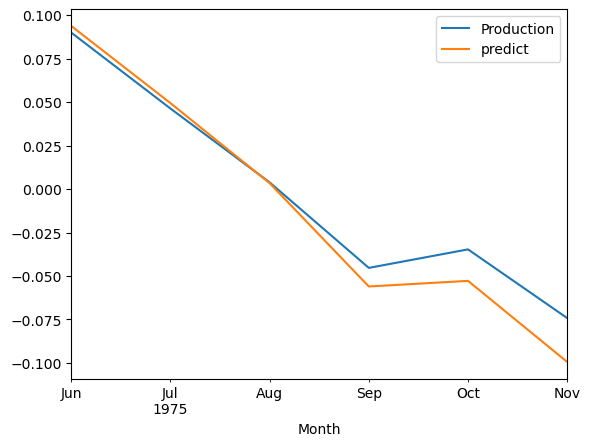

In [54]:
new_data[['Production','predict']].plot()

In [55]:
forecast=model.forecast(steps=120)

<Axes: >

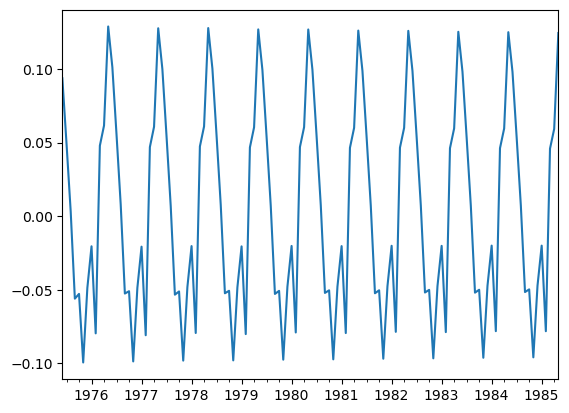

In [56]:
forecast.plot()